<a href="https://colab.research.google.com/github/bhende27/Begali-Digit-Recognition-with-LeNet/blob/master/16MI31022_T5b_ADAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI61002_Spr2020
## Tutorial 5 : Training LeNet for Digit Recognition using ADAM
##Part 1: Training error/ Accuracy vs Epoch with diffrent batchsize with fixed learning rate=0.001

In [ ]:
%matplotlib inline
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

### Load data

In [ ]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
#BatchSize = 128 # change according to system specs
BatchSize= [64,128,256,512,1024]
trainLoader=[]
testLoader=[]
for i in range(0,5):
  trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
  TrainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize[i],          #Diffrent dataset with diffrent batchsize
                                            shuffle=True, num_workers=4) # Creating dataloader
  trainLoader.append(TrainLoader)                                         

  # Validation set with random rotations in the range [-90,90]
  testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
  TestLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize[i],
                                          shuffle=False, num_workers=4) # Creating dataloader
  testLoader.append(TestLoader)                                        


Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw
Processing...
Done!


In [ ]:
len(trainLoader)

5

In [ ]:
# Size of train and test datasets
for i in range(0,5):
  print('No. of samples in train set: '+str(len(trainLoader[i].dataset)))
  print('No. of samples in test set: '+str(len(testLoader[i].dataset)))

No. of samples in train set: 60000
No. of samples in test set: 10000
No. of samples in train set: 60000
No. of samples in test set: 10000
No. of samples in train set: 60000
No. of samples in test set: 10000
No. of samples in train set: 60000
No. of samples in test set: 10000
No. of samples in train set: 60000
No. of samples in test set: 10000


### Define model architecture

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [ ]:
use_gpu = torch.cuda.is_available()
net1 = LeNet()
net2 = LeNet()
net3 = LeNet()          #5 net defined for 5 diffrent batchsize
net4 = LeNet()
net5 = LeNet()
net=[net1, net2, net3, net4, net5]
print(net)
'''if use_gpu:
    print('GPU is avaialble!')
    net = net.cuda()'''

[LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
), LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
), LeNet(
  (conv1): Conv2d(1, 6, 

"if use_gpu:\n    print('GPU is avaialble!')\n    net = net.cuda()"

### Train model

In [ ]:
Learning_rate = 0.0001
num_epochs = 50
import torch.optim as optim
criterion = nn.CrossEntropyLoss() 


train_loss = []
train_acc = []
Train_loss = []
Train_acc = []
for m in range(0,5):
  print("For Batchsize: "+ str(BatchSize[m]) +" and Neural Network net "+ str(m+1) )
  optimizer = optim.Adam(net[m].parameters(),lr=Learning_rate)
  for epoch in range(num_epochs):
      
      running_loss = 0.0 
      running_corr = 0   
      for i,data in enumerate(trainLoader[m]):
          inputs,labels = data
          if use_gpu:
              inputs, labels = inputs.cuda(),labels.cuda() 
          # Initializing model gradients to zero
          #net.zero_grad()
          optimizer.zero_grad() 
          # Data feed-forward through the network
          outputs = net[m](inputs)
          # Predicted class is the one with maximum probability
          preds = torch.argmax(outputs,dim=1)
          # Finding the loss
          loss = criterion(outputs, labels)
          # Accumulating the loss for each batch
          running_loss += loss 
          # Accumulate number of correct predictions
          running_corr += torch.sum(preds==labels)   

          
          
          #totalLoss = running_loss/(i+1)
          # Calculating gradients
          loss.backward()
          # Updating the model parameters
          optimizer.step()
          #for f in net.parameters():
          #   f.data.sub_(f.grad.data * learning_rate)
          
      epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
      epoch_acc = running_corr.item()/60000
      
      
          
      train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
      train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
        
          
      print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))     
  Train_loss.append(train_loss)  #Saving the loss for diffrent batch size for plotting the graph
  Train_acc.append(train_acc) 
  train_loss = []
  train_acc = []              

For Batchsize: 64 and Neural Network net 1
Epoch 1/50 : Training loss: 0.0350 | Training Accuracy: 98.9433
Epoch 2/50 : Training loss: 0.0309 | Training Accuracy: 99.0650
Epoch 3/50 : Training loss: 0.0287 | Training Accuracy: 99.1600
Epoch 4/50 : Training loss: 0.0268 | Training Accuracy: 99.1733
Epoch 5/50 : Training loss: 0.0252 | Training Accuracy: 99.3067
Epoch 6/50 : Training loss: 0.0234 | Training Accuracy: 99.3067
Epoch 7/50 : Training loss: 0.0220 | Training Accuracy: 99.3533
Epoch 8/50 : Training loss: 0.0207 | Training Accuracy: 99.4000
Epoch 9/50 : Training loss: 0.0195 | Training Accuracy: 99.4200
Epoch 10/50 : Training loss: 0.0187 | Training Accuracy: 99.4400
Epoch 11/50 : Training loss: 0.0174 | Training Accuracy: 99.4950
Epoch 12/50 : Training loss: 0.0166 | Training Accuracy: 99.5267
Epoch 13/50 : Training loss: 0.0156 | Training Accuracy: 99.5267
Epoch 14/50 : Training loss: 0.0149 | Training Accuracy: 99.5583
Epoch 15/50 : Training loss: 0.0142 | Training Accuracy:

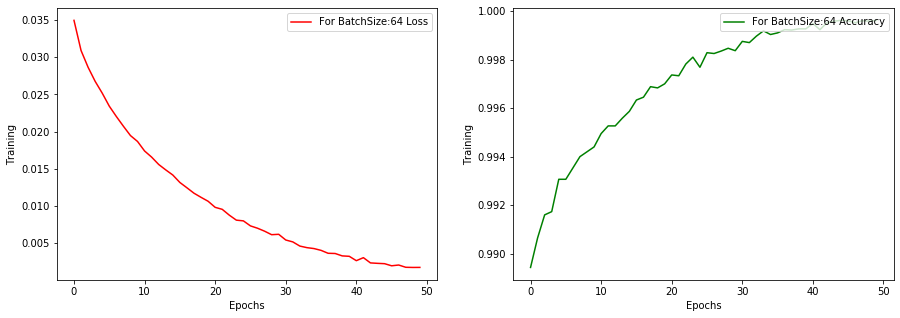

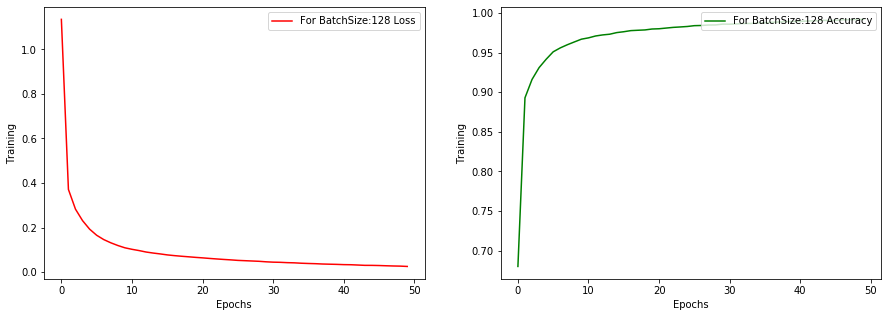

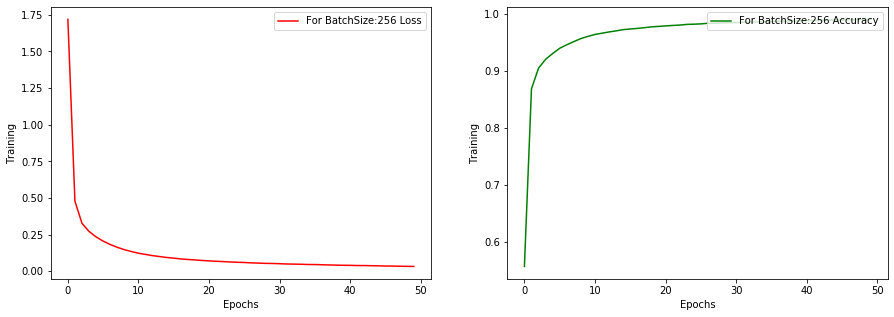

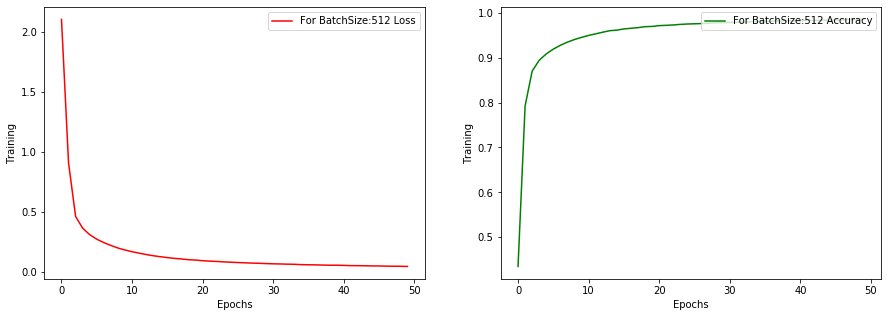

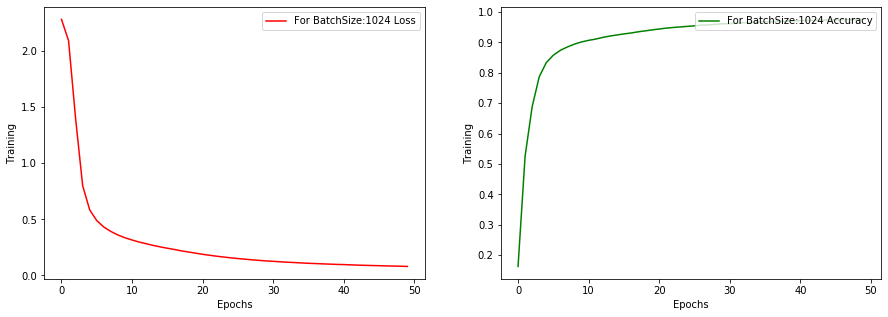

In [ ]:
temp=[0,1,2,3,4]

for j in temp:
  title="For BatchSize:"+ str(BatchSize[j])
  fig = plt.figure(figsize=[15,5]) 
  plt.subplot(121)
  plt.plot(range(num_epochs),Train_loss[j],'r-',label=title+ " Loss") 
  plt.legend(loc='upper right')
  plt.xlabel('Epochs')
  plt.ylabel('Training')
  plt.subplot(122)
  plt.plot(range(num_epochs),Train_acc[j],'g-',label=title+ ' Accuracy') 
  plt.legend(loc='upper right')
  plt.xlabel('Epochs')
  plt.ylabel('Training')

##Larger the Batch size, faster Network will Learn for fixed Learning rate

### Evaluation of trained model

In [ ]:
correct_pred = 0
for j in range(0,5):
  print("For BatchSize:"+ str(BatchSize[j]))
  for data in testLoader[j]:
      inputs,labels = data
      if use_gpu:
          inputs, labels = inputs.cuda(),labels.cuda()
      # Feedforward train data batch through model
      output = net[j](inputs) 
      # Predicted class is the one with maximum probability
      preds = torch.argmax(output,dim=1)
      correct_pred += torch.sum(preds==labels)

  test_accuracy = correct_pred.item()/10000.0
  print('Testing accuracy = ',test_accuracy*100)
  correct_pred=0

For BatchSize:64
Testing accuracy =  99.11999999999999
For BatchSize:128
Testing accuracy =  98.72
For BatchSize:256
Testing accuracy =  98.88
For BatchSize:512
Testing accuracy =  98.4
For BatchSize:1024
Testing accuracy =  97.72999999999999


##AI61002_Spr2020
##Tutorial 5: Training LeNet for Digit Recognition using ADAM
##Part 2: Training error/ Accuracy vs Epoch with diffrent Learning Rate with fixed Batch Size =128


In [ ]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize1 = 128 # change according to system specs

trainset1 = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader1 = torch.utils.data.DataLoader(trainset1, batch_size=BatchSize1,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
testset1 = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader1 = torch.utils.data.DataLoader(testset1, batch_size=BatchSize1,
                                         shuffle=False, num_workers=4) # Creating dataloader

In [ ]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainLoader1.dataset)))
print('No. of samples in test set: '+str(len(testLoader1.dataset)))

No. of samples in train set: 60000
No. of samples in test set: 10000


In [ ]:
use_gpu = torch.cuda.is_available()
net6 = LeNet()
net7 = LeNet()
net8 = LeNet()          #5 net defined for 5 diffrent Learning Rate
net9 = LeNet()
Net=[net6, net7, net8, net9]
print(Net)

[LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
), LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
), LeNet(
  (conv1): Conv2d(1, 6, 

In [ ]:
learning_rate = [0.0005,0.001, 0.005, 0.01]
num_epochs1 = 50
import torch.optim as optim
criterion = nn.CrossEntropyLoss() 


train_loss1 = []
train_acc1 = []
Train_loss1 = []
Train_acc1 = []
for m in range(0,4):
  print("For Learning Rate: "+ str(learning_rate[m]) +" and Neural Network net "+ str(m+1) )
  optimizer = optim.Adam(Net[m].parameters(),lr=learning_rate[m])
  for epoch in range(num_epochs1):
      
      running_loss = 0.0 
      running_corr = 0
          
      for i,data in enumerate(trainLoader1):
          inputs,labels = data
          if use_gpu:
              inputs, labels = inputs.cuda(),labels.cuda() 
          # Initializing model gradients to zero
          #net.zero_grad()
          optimizer.zero_grad() 
          # Data feed-forward through the network
          outputs = Net[m](inputs)
          # Predicted class is the one with maximum probability
          preds = torch.argmax(outputs,dim=1)
          # Finding the loss
          loss = criterion(outputs, labels)
          # Accumulating the loss for each batch
          running_loss += loss 
          # Accumulate number of correct predictions
          running_corr += torch.sum(preds==labels)   

          
          
          #totalLoss = running_loss/(i+1)
          # Calculating gradients
          loss.backward()
          # Updating the model parameters
          optimizer.step()
          #for f in net.parameters():
          #   f.data.sub_(f.grad.data * learning_rate)
          
      epoch_loss1 = running_loss.item()/(i+1)   #Total loss for one epoch
      epoch_acc1 = running_corr.item()/60000
      
      
          
      train_loss1.append(epoch_loss1) #Saving the loss over epochs for plotting the graph
      train_acc1.append(epoch_acc1) #Saving the accuracy over epochs for plotting the graph
        
          
      print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs1,epoch_loss1,epoch_acc1*100)) 
  Train_loss1.append(train_loss1)  #Saving the loss for diffrent learning rate for plotting the graph
  Train_acc1.append(train_acc1) 
  train_loss1 = []
  train_acc1 = []

For Learning Rate: 0.0005 and Neural Network net 1
Epoch 1/50 : Training loss: 0.5241 | Training Accuracy: 84.3550
Epoch 2/50 : Training loss: 0.1450 | Training Accuracy: 95.6267
Epoch 3/50 : Training loss: 0.0948 | Training Accuracy: 97.1317
Epoch 4/50 : Training loss: 0.0745 | Training Accuracy: 97.7417
Epoch 5/50 : Training loss: 0.0614 | Training Accuracy: 98.1267
Epoch 6/50 : Training loss: 0.0540 | Training Accuracy: 98.3100
Epoch 7/50 : Training loss: 0.0481 | Training Accuracy: 98.5400
Epoch 8/50 : Training loss: 0.0418 | Training Accuracy: 98.7450
Epoch 9/50 : Training loss: 0.0369 | Training Accuracy: 98.8283
Epoch 10/50 : Training loss: 0.0337 | Training Accuracy: 98.9283
Epoch 11/50 : Training loss: 0.0296 | Training Accuracy: 99.0983
Epoch 12/50 : Training loss: 0.0274 | Training Accuracy: 99.1517
Epoch 13/50 : Training loss: 0.0256 | Training Accuracy: 99.1733
Epoch 14/50 : Training loss: 0.0236 | Training Accuracy: 99.2700
Epoch 15/50 : Training loss: 0.0219 | Training A

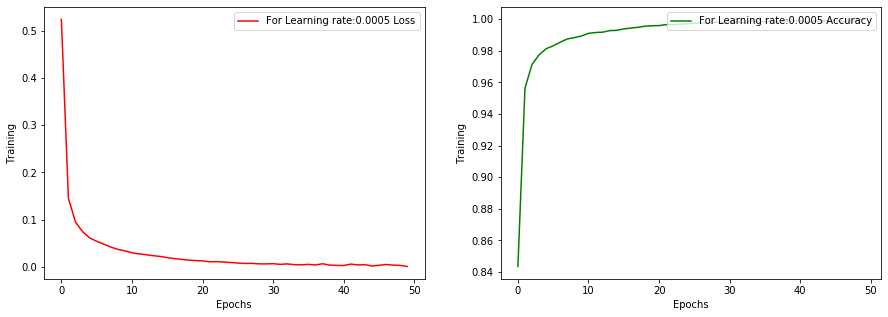

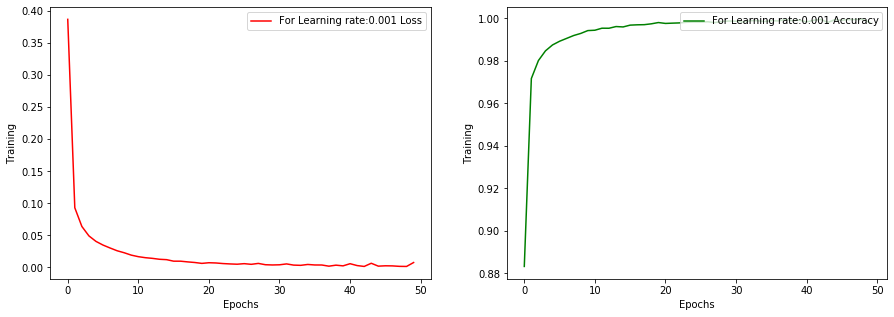

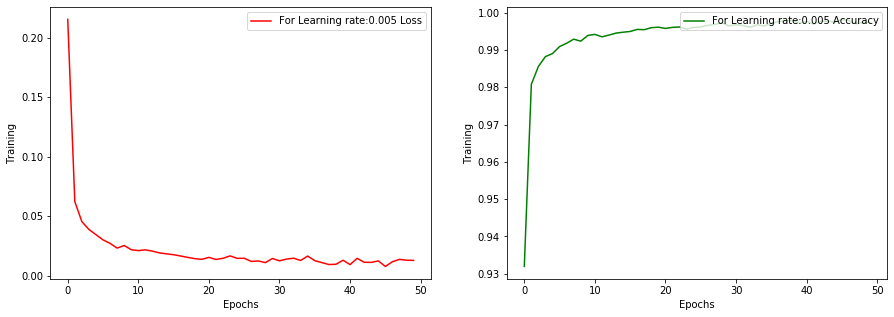

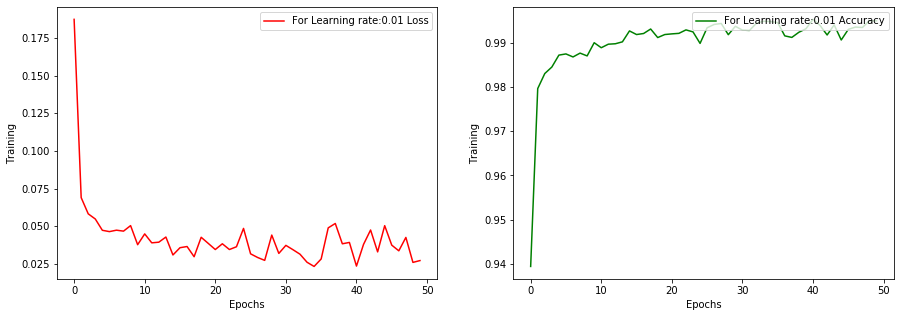

In [ ]:
temp1=[0,1,2,3]
for j in temp1:
  title="For Learning rate:"+ str(learning_rate[j])
  fig = plt.figure(figsize=[15,5]) 
  plt.subplot(121)
  plt.plot(range(num_epochs1),Train_loss1[j],'r-',label=title +' Loss') 
  plt.legend(loc='upper right')
  plt.xlabel('Epochs')
  plt.ylabel('Training')
  plt.subplot(122)
  plt.plot(range(num_epochs1),Train_acc1[j],'g-',label=title+ ' Accuracy') 
  plt.legend(loc='upper right')
  plt.xlabel('Epochs')
  plt.ylabel('Training')

##Thus we can conclude, we need to set low value of learning rate for ADAM

In [ ]:
correct_pred1 = 0
for j in range(0,4):
  print("For Learning Rate:"+ str(learning_rate[j]))
  for data in testLoader1:
      inputs,labels = data
      if use_gpu:
          inputs, labels = inputs.cuda(),labels.cuda()
      # Feedforward train data batch through model
      output = Net[j](inputs) 
      # Predicted class is the one with maximum probability
      preds = torch.argmax(output,dim=1)
      correct_pred1 += torch.sum(preds==labels)

  test_accuracy1 = correct_pred1.item()/10000.0
  print('Testing accuracy = ',test_accuracy1*100)
  correct_pred1=0

For Learning Rate:0.0005
Testing accuracy =  99.13
For Learning Rate:0.001
Testing accuracy =  98.94
For Learning Rate:0.005
Testing accuracy =  98.89
For Learning Rate:0.01
Testing accuracy =  98.61
